In [63]:
import ingestor, modeller, fitter
import numpy as np
import matplotlib.pyplot as plt
import casadi as ca
import pandas as pd

In [64]:
plt.style.use('seaborn-notebook')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['figure.figsize'] = [15, 10]

In [65]:
from importlib import reload

reload(ingestor)
reload(modeller)
reload(fitter)

<module 'fitter' from '/media/dwu402/Data/wrap-mad/fitter.py'>

In [67]:
context = ingestor.Context("runs/minimal4.3.run")

In [68]:
model = modeller.Model(context)

In [69]:
solver = fitter.Fitter()
solver.construct_objectives(context, model)

In [70]:
solver.construct_problems()

In [71]:
def supplant(idx, val, arr):
    return arr[:idx] + [val] + arr[idx+1:]

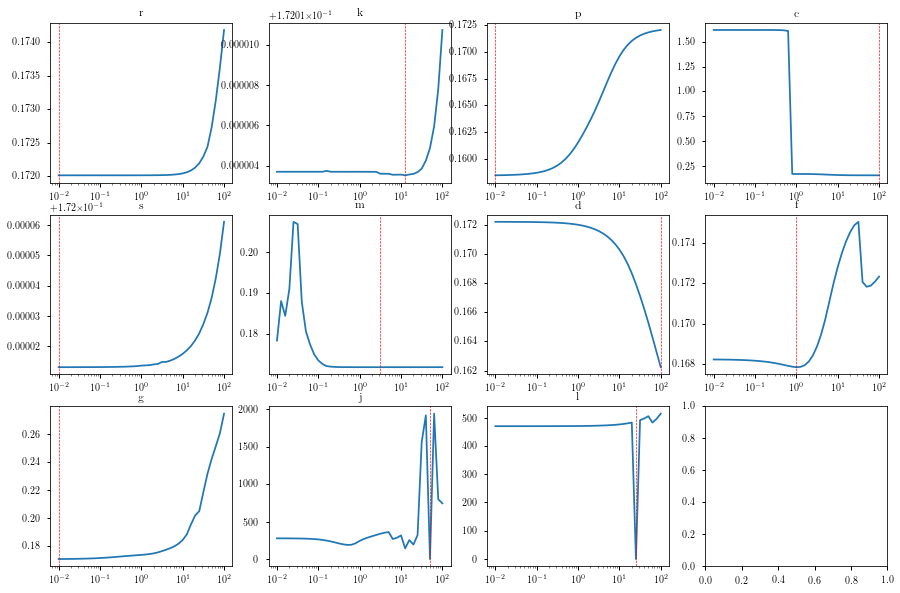

In [77]:
rho = 100

problem = solver.problems[0]

fig, axes = plt.subplots(nrows=3, ncols=4)
flat_axes = axes.flatten()
fn_values = dict()

for idx, parameter in enumerate("rkpcsmdfgjl"):
    fn_values[parameter] = []
    for r in np.logspace(-2, 2, 41):
        fn_val = problem.function(supplant(idx, r, problem.initial_guess), rho=rho)
        fn_values[parameter].append((r, fn_val))

    flat_axes[idx].semilogx(*np.array(fn_values[parameter]).T)
    flat_axes[idx].axvline(x = min(fn_values[parameter], key=lambda x:x[1])[0], color='r', linestyle='--', linewidth=0.65)
    flat_axes[idx].set_title(parameter)

In [78]:
min_ps = [min(fn_values[parameter], key=lambda x:x[1])[0] for parameter in "rkpcsmdfgjl"]

print(min_ps)

[0.01, 12.589254117941675, 0.01, 100.0, 0.01, 3.1622776601683795, 100.0, 1.0, 0.01, 50.11872336272725, 25.11886431509582]


In [76]:
problem.initial_guess = min_ps